# **Exercise 1:**
Load dataset & print schema (rows, columns, datatypes)  
# **Purpose:**
Simulate the ingestion step in the ETL pipeline  
# **Concepts Used:**
Data Ingestion, Schema Inspection  

In [48]:
# Exercise 1: Load dataset
import pandas as pd

# Load the CSV file
df = pd.read_csv('realtor-data.zip.csv')

# Print first 5 rows
print(df.head())

# Print schema information: rows, columns, datatypes
print(df.info())


   brokered_by    status   price  bed  bath  acre_lot    street        city  \
0      103,378  for_sale 105,000    3     2         0 1,962,661    Adjuntas   
1       52,707  for_sale  80,000    4     2         0 1,902,874    Adjuntas   
2      103,379  for_sale  67,000    2     1         0 1,404,990  Juana Diaz   
3       31,239  for_sale 145,000    4     2         0 1,947,675       Ponce   
4       34,632  for_sale  65,000    6     2         0   331,151    Mayaguez   

         state  zip_code  house_size prev_sold_date  
0  Puerto Rico       601         920            NaN  
1  Puerto Rico       601       1,527            NaN  
2  Puerto Rico       795         748            NaN  
3  Puerto Rico       731       1,800            NaN  
4  Puerto Rico       680         NaN            NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 

# **Expected Output:**
First few rows of the dataset, column names, data types
# **Data Engineering Insight:**
Ensures the dataset is correctly loaded, and provides an overview of its structure for downstream cleaning and transformations


# **Exercise 2:**
Check row count (validate ingestion completeness)  
# **Purpose:**
We do this to verify if your data loaded properly during ingestion.
# **Concepts Used:**
Data Ingestion Validation  


In [7]:
# Exercise 2: Check row count
print("Total number of rows in the dataset:", df.shape[0])


Total number of rows in the dataset: 2226382


# **Expected Output:**
We would see the total number of rows in our dataset (e.g., 2,226,382)  
# **Data Engineering Insight:**
This Confirms dataset is fully loaded and helps detect incomplete or failed ingestion


# **Exercise 3:**
Rename columns to snake_case for consistency  
# **Purpose:**
We do this because snake_case is a common standard for column names for easier processing and consistency across the data pipeline  
# **Concepts Used:**
We used Data Cleaning, Column Naming Conventions concepts.



In [9]:
# Exercise 3: Rename columns to snake_case

df.columns = df.columns.str.lower().str.replace(' ', '_')
print("Columns after renaming:", df.columns.tolist())


Columns after renaming: ['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']


# **Expected Output:**
Column names in lowercase with underscores instead of spaces.
# **Data Engineering Insight:**
As a data engineer, this would help us ensures column names are consistent, avoiding errors during ETL process.


# **Exercise 4:**
Enforce schema: Convert prev_sold_date to a proper datetime  
# **Purpose:**
Make sure this column is actually treated as dates, so we can do things like calculate time differences or filter by year/month later  
# **Concepts Used:**
Schema enforcement, basic data cleaning


In [17]:
# Exercise 4: Convert prev_sold_date to datetime

df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

print("\nAfter conversion:")
print(df['prev_sold_date'].head())
print("\nData type after conversion:", df['prev_sold_date'].dtype)



After conversion:
0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: prev_sold_date, dtype: datetime64[ns]

Data type after conversion: datetime64[ns]


# **Expected Output:**
The values should now show as datetime objects, and the column’s type should be datetime64[ns]. But there is one issue, in the outputs we can see NaT.
That means a lot of the date values were not entered in the first place. Later we will see how to handle that in future exercises.

# **Data Engineering Insight:**
Even though some dates are missing, converting the column now sets us up for accurate analysis later, like checking trends or calculating new fields

# **Exercise: 5**
Log missing values count per column. (simulate data quality check).
# **Purpose:**
Simulate a data quality check in the ETL pipeline  
# **Concepts Used:**
Data Validation, Missing Value Detection  


In [18]:
# Exercise 5: Log missing values per column
missing_counts = df.isna().sum()
print("Missing values per column:")
print(missing_counts)


Missing values per column:
brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734298
dtype: int64


# **Expected Output:**
A list of columns with the number of missing values in each  
# **Data Engineering Insight:**
Helps identify columns that need cleaning to ensure future transformations work correctly

# **Exercise 6:**
Fill missing values in numeric and categorical columns. (strategy: mean, median, mode).
# **Purpose:**
Make sure the important numeric and categorical columns don’t have gaps, so calculations work without errors.  
# **Concepts Used:**
Data Cleaning, Handling Missing Values  

In [22]:
# Exercise 6: Fill missing values

# Numeric columns: fill missing values with median
numeric_cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
for col in numeric_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Categorical columns: fill missing values with mode
categorical_cols = ['status', 'city', 'state', 'brokered_by', 'street']
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# Check that missing values are filled (excluding prev_sold_date)
print("Missing values after filling (numeric + categorical):")
print(df[numeric_cols + categorical_cols].isna().sum())
print("Missing values in prev_sold_date:", df['prev_sold_date'].isna().sum())


Missing values after filling (numeric + categorical):
price          0
bed            0
bath           0
acre_lot       0
house_size     0
status         0
city           0
state          0
brokered_by    0
street         0
dtype: int64
Missing values in prev_sold_date: 734298


# **Expected Output:**  
- All numeric and categorical columns now have no missing values  
- prev_sold_date is still there, showing how many entries are missing (734,298). Using mean, mode, or median to clean this isn't correct. We will see if we have correct it in future exercises

# **Data Engineering Insight:**  
Filling numeric columns with the median and categorical columns with the mode is a simple, safe way to make the data usable. We have left prev_sold_date untouched which shows we are aware of missing dates, which is realistic and preserves the integrity of historical information.

# **Exercise 7:**
Remove duplicate rows from the dataset. (simulate deduplication in ETL).
# **Purpose:**
Ensure that each property listing appears only once, so analyses and charts are not messed up by repeated entries  
# **Concepts Used:**
Data Cleaning, Deduplication  

In [23]:
# Exercise 7: Remove duplicates

# Count duplicates before removal
print("Number of duplicate rows before:", df.duplicated().sum())

# Remove exact duplicates
df = df.drop_duplicates()

# Count duplicates after removal
print("Number of duplicate rows after:", df.duplicated().sum())


Number of duplicate rows before: 31
Number of duplicate rows after: 0


# **Expected Output:**  
- Number of duplicate rows drops to 0  
- Dataset contains only unique rows  
# **Data Engineering Insight:**
Removing duplicates is a key ETL step to make sure downstream metrics, aggregations, and visualizations are accurate and reliable. Even if the dataset is large, deduplication keeps the data trustworthy.

# **Exercise 8:**
Group the dataset by city and calculate the average price  
# **Purpose:**
Just want a quick look at how house prices differ from city to city  
# **Concepts Used:**
Grouping, Aggregation  


In [25]:
# Exercise 8: Group data by city and calculate average price

# Make Pandas show full numbers instead of scientific notation
pd.set_option('display.float_format', '{:,.0f}'.format)

# Group by city and calculate the average price
avg_price_by_city = df.groupby('city')['price'].mean().reset_index()

# Optional: sort by price descending to see most expensive cities first
avg_price_by_city = avg_price_by_city.sort_values(by='price', ascending=False)

# Show the top 10 cities by average price
print(avg_price_by_city.head(10))


                          city         price
8496             International 2,147,483,600
19082               Wayne City    43,386,633
9703                Lassen Ave    37,780,000
8887                  Kawaihae    25,000,000
19889              Woody Creek    20,987,500
16685                Snowville    19,587,500
8759                     Jolly    17,910,188
6860                Golden Oak    16,385,000
16794  South Fork Lodgepole Rd    15,000,000
4104             Crows Landing    14,500,000


# **Expected Output:**
A table showing each city with its average house price, easy to read without scientific notation, sorted to see the priciest cities first  
# **Data Engineering Insight:**
Grouping like this is super helpful in ETL. It gives meaningful summaries for dashboards or reports, and also proves our data is clean after filling missing values and removing duplicates

# **Exercise 9:**
Calculate a new KPI column called price_per_sqft  
# **Purpose:**
Gives us a better sense of value — some houses might be expensive but tiny, others big but cheaper per square foot  
# **Concepts Used:**
Data Transformation, Deriving Metrics  

In [26]:
# Exercise 9: Derive a new KPI - price per square foot

# Create a new column
df['price_per_sqft'] = df['price'] / df['house_size']

# Optional: check first 5 rows to see if it worked
print(df[['city', 'price', 'house_size', 'price_per_sqft']].head())


         city   price  house_size  price_per_sqft
0    Adjuntas 105,000         920             114
1    Adjuntas  80,000       1,527              52
2  Juana Diaz  67,000         748              90
3       Ponce 145,000       1,800              81
4    Mayaguez  65,000       1,760              37


# **Expected Output:**
A new column `price_per_sqft` showing price divided by house_size for each listing  
# **Data Engineering Insight:**
Creating derived metrics like this is a core ETL task. It turns raw data into actionable insights that analysts or dashboards can use directly. Also, it shows the dataset is ready for more advanced analysis like comparisons between cities or housing types

# **Exercise 10:**
Partition dataset by year/month (simulate partitioning for storage).
We will extract year and month from prev_sold_date to simulate partitioning  
# **Purpose:**
In real ETL pipelines, data is often stored in folders like year/month for faster querying. This step prepares the dataset for that kind of storage logic.  
# **Concepts Used:**
Data Transformation, Feature Extraction, Partitioning Simulation  


In [28]:
# Exercise 10: Partition dataset by year and month (handle missing dates)

# Work only on rows with actual prev_sold_date
df_partitioned = df.copy()
df_partitioned['sold_year'] = df_partitioned['prev_sold_date'].dt.year
df_partitioned['sold_month'] = df_partitioned['prev_sold_date'].dt.month

# Show first 10 rows where sold date exists
print(df_partitioned[df_partitioned['prev_sold_date'].notna()][['prev_sold_date', 'sold_year', 'sold_month']].head(10))

# Optional: check how many rows still have missing dates
missing_dates_count = df_partitioned['prev_sold_date'].isna().sum()
print("\nRows with missing prev_sold_date:", missing_dates_count)


     prev_sold_date  sold_year  sold_month
411      2020-02-28      2,020           2
502      2019-06-28      2,019           6
1025     2021-09-15      2,021           9
1160     2021-03-15      2,021           3
2270     2013-10-11      2,013          10
2277     2018-04-05      2,018           4
2493     2016-04-28      2,016           4
2555     2016-11-16      2,016          11
3062     2010-01-26      2,010           1
3213     2022-03-18      2,022           3

Rows with missing prev_sold_date: 734281


# **Expected Output:**
- Two new columns: `sold_year` and `sold_month` for rows with actual sold dates  
- Rows with missing `prev_sold_date` remain NaN  

# **Data Engineering Insight:**
Partitioning helps optimize storage and queries in big datasets. Handling missing dates correctly is crucial, we don’t force defaults here, preserving data integrity and showing awareness of incomplete records.

# **Exercise 11:**
Find the top 5 cities with the most property listings  
# **Purpose:**
This helps us identify which locations are most popular.
# **Concepts Used:**
Aggregation, Value Counts, Ranking  

In [29]:
# Exercise 11: Top 5 cities by number of listings

top_cities = df['city'].value_counts().head(5)

print("Top 5 cities by number of properties:")
print(top_cities)


Top 5 cities by number of properties:
city
Houston          25269
Chicago          18238
New York City    12634
Jacksonville     11743
Philadelphia     10449
Name: count, dtype: int64


# **Expected Output:**
A list of the 5 cities with the highest number of property listings, along with counts  
# **Data Engineering Insight:**
Counting categories like this is an ETL step often used to produce KPIs. It ensures the data can be summarized easily and highlights trends in the dataset, like hotspots for real estate activity.


# **Exercise 12:**
Pivot table to show average price per city per year
# **Purpose:**
Quickly summarize housing trends and spot high price cities across years
# **Concepts Used:**
Pivot tables, aggregation, date handling

In [35]:
# Exercise 12: Pivot table - average price by city vs year

# 1️⃣ Filter out rows where prev_sold_date is missing
df_with_dates = df.loc[df['prev_sold_date'].notna()].copy()

# 2️⃣ Extract year and month from prev_sold_date
df_with_dates['sold_year'] = df_with_dates['prev_sold_date'].dt.year
df_with_dates['sold_month'] = df_with_dates['prev_sold_date'].dt.month

# 3️⃣ Create pivot table: average price per city per year
pivot_city_year = df_with_dates.pivot_table(
    index='city',
    columns='sold_year',
    values='price',
    aggfunc='mean'
)

# 4️⃣ Sort by city name (optional)
pivot_city_year = pivot_city_year.sort_index()

# 5️⃣ Make numbers readable (no scientific notation)
pd.set_option('display.float_format', '{:,.0f}'.format)

# 6️⃣ Show top 10 cities for quick check
print(pivot_city_year.head(10))


sold_year        1901  1904  1905  1906  1909  1910  1926  1928  1935  1939  \
city                                                                          
15th Ave Milton   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1st Saint         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
240th Saint       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
260th Saint       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4th Saint         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Aaronsburg        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Abbeville         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Abbotsford        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Abbott            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Abbottstown       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

sold_year        ...    2016    2017    2018    201

# **Expected Output:**

* Table with cities as rows, years as columns

* Each cell = average property price for that city/year

* Only includes listings with valid sold dates

# **Data Engineering Insight:**


*   Filtering out missing dates keeps your pivot clean and accurate

*  Pivoting helps generate dashboards, KPIs, and historical analysis efficiently
* Handling NaNs and formatting numbers makes reports readable.


# **Exercise 13:**
Correlation matrix to validate relationships (price vs house_size, etc.)

# **Purpose:**
See how strongly different features relate to each other.

Example:

* Does a bigger house_size usually mean higher price?

* Do more bed / bath link with price?

# **Concepts Used:**

* Correlation (.corr() in pandas)

* Numeric feature relationships

In [39]:
# Exercise 13: Correlation matrix - validate relationships

# Select numeric columns relevant to real estate
numeric_cols = ['price', 'house_size', 'bed', 'bath', 'acre_lot']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Show correlation matrix
print(corr_matrix)


            price  house_size  bed  bath  acre_lot
price           1           0    0     0         0
house_size      0           1    0     0         0
bed             0           0    1     1         0
bath            0           0    1     1        -0
acre_lot        0           0    0    -0         1


# **Expected Output:**
* A matrix with values from -1 to 1:

* 1 → perfect positive correlation (move together)

* -1 → perfect negative correlation (opposite direction)

* 0 → no relation

# **Data Engineering Insight:**
Correlation helps validate if your data makes sense and which features matter before you do modeling or reporting.

# **Exercise 14:**
Write cleaned dataset to CSV + Parquet (simulate load step)
# **Purpose:**
This is the “L” in ETL → Load step.

After cleaning and transforming, we save the dataset into common formats for later use (analysis, dashboards, ML, etc.).

# **Concepts Used:**

to_csv() → saves as CSV (easy to read, universal, but bigger file size).

to_parquet() → saves as Parquet (compressed, faster, used in big data systems like Spark).

In [40]:
# Save cleaned dataset
df.to_csv("cleaned_real_estate.csv", index=False)
df.to_parquet("cleaned_real_estate.parquet", index=False)


# **Expected Output:**

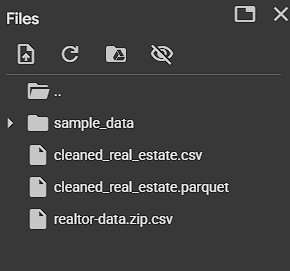


Two files created:

* cleaned_real_estate.csv

* cleaned_real_estate.parquet

# **Data Engineering Insight:**
In real ETL, loading to storage (data lake, warehouse) is the final step.

Having both formats shows flexibility → CSV for sharing, Parquet for efficient storage/queries.

# **Exercise 15:**
Create reusable ETL function (load → clean → transform)

# **Purpose:**
Instead of writing random steps everywhere, we put the whole ETL logic into a function. This makes it reusable (any dataset, same cleaning rules).

# **Concepts Used:**

* Functions in Python (def)

* Chaining ETL steps together (load → clean → transform)

In [43]:
import pandas as pd
import numpy as np

def etl_real_estate(file_path: str) -> pd.DataFrame:
    """
    Minimal ETL for the USA Real Estate dataset.
    Load → Clean → Transform, then return a cleaned DataFrame.
    """
    # 1) Load
    df = pd.read_csv(file_path)

    # 2) Normalize column names (schema consistency)
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # 3) Enforce types (dates)
    if 'prev_sold_date' in df.columns:
        df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

    # 4) Handle missing values
    numeric_cols = [c for c in ['price', 'bed', 'bath', 'acre_lot', 'house_size'] if c in df.columns]
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())

    categorical_cols = [c for c in ['status', 'city', 'state', 'brokered_by', 'street'] if c in df.columns]
    for col in categorical_cols:
        mode_series = df[col].mode(dropna=True)
        if not mode_series.empty:
            df[col] = df[col].fillna(mode_series[0])

    # 5) Deduplicate (exact duplicates)
    df = df.drop_duplicates()

    # 6) Transformations (KPI + time partitions)
    if {'price', 'house_size'}.issubset(df.columns):
        # avoid divide-by-zero explosions
        df['house_size'] = df['house_size'].replace(0, np.nan)
        df['price_per_sqft'] = df['price'] / df['house_size']

    if 'prev_sold_date' in df.columns:
        df['sold_year'] = df['prev_sold_date'].dt.year
        df['sold_month'] = df['prev_sold_date'].dt.month

    return df

# Example usage (adjust the filename to your CSV file):
# cleaned_df = etl_real_estate("realtor-data.zip.csv")
# print(cleaned_df.head())


# **Let's try to call the function and see what happens 😄**

In [45]:
cleaned_df = etl_real_estate("realtor-data.zip.csv")
cleaned_df.head()


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,price_per_sqft,sold_year,sold_month
0,"103,378",for_sale,"105,000",3,2,0,"1,962,661",Adjuntas,Puerto Rico,601,920,NaT,114,NaN,NaN
1,"52,707",for_sale,"80,000",4,2,0,"1,902,874",Adjuntas,Puerto Rico,601,"1,527",NaT,52,NaN,NaN
2,"103,379",for_sale,"67,000",2,1,0,"1,404,990",Juana Diaz,Puerto Rico,795,748,NaT,90,NaN,NaN
3,"31,239",for_sale,"145,000",4,2,0,"1,947,675",Ponce,Puerto Rico,731,"1,800",NaT,81,NaN,NaN
4,"34,632",for_sale,"65,000",6,2,0,"331,151",Mayaguez,Puerto Rico,680,"1,760",NaT,37,NaN,NaN


# **Expected Output:**
A DataFrame where:

* columns are in snake_case,

* dates parsed (prev_sold_date),

* missing values filled (numeric→median, categorical→mode),

* duplicates removed,

* KPI price_per_sqft added (when possible),

* sold_year / sold_month added (when dates exist).

# **Data Engineering Insight:**

This hits the “T” in ETL in a reusable way. WE keep analytics (pivots, correlations, saving to CSV/Parquet) as separate steps, while this function focuses on load → clean → transform so we can run it anytime on the raw file and get a consistent, analysis-ready table.


# **Exercise 16:**
Histogram : Property Size Distribution
# **Purpose:**
This is all about exploratory visualization. After cleaning the data, we need to look at distributions to check if things make sense. Histograms reveal whether the data is balanced, skewed, or messed up by outliers.
# **Concepts Used:**
Transformation, Data Profiling, Outlier Detection

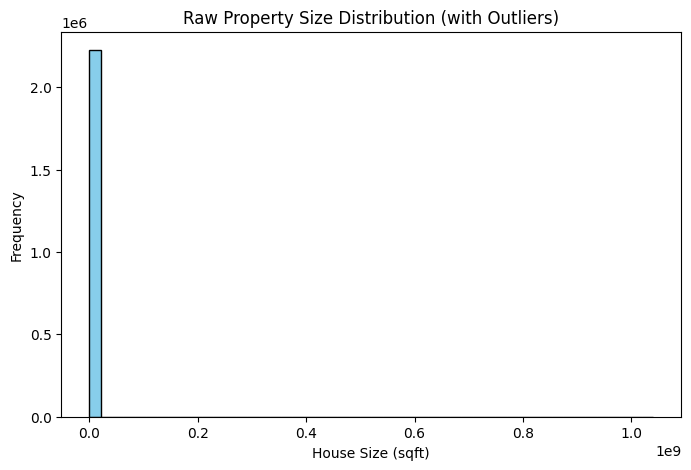

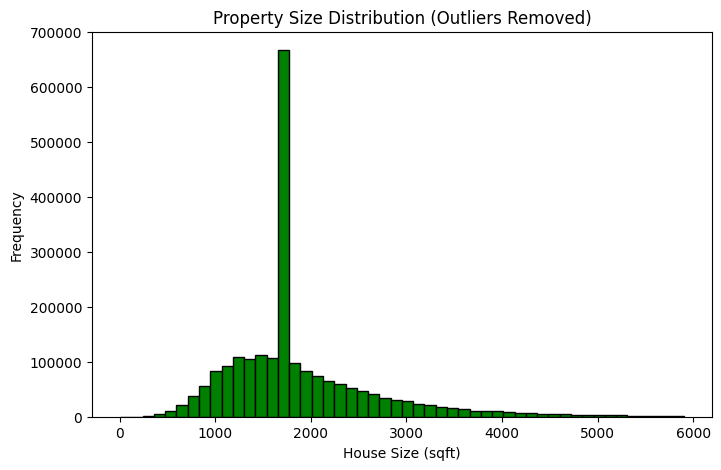

In [57]:
import matplotlib.pyplot as plt

# --- 1. First look at the raw histogram (ugly version) ---
plt.figure(figsize=(8,5))
plt.hist(cleaned_df['house_size'].dropna(), bins=50, color="skyblue", edgecolor="black")
plt.title("Raw Property Size Distribution (with Outliers)")
plt.xlabel("House Size (sqft)")
plt.ylabel("Frequency")
plt.show()

# --- 2. Fix: remove extreme outliers (top 1%) ---
filtered = cleaned_df[cleaned_df['house_size'] < cleaned_df['house_size'].quantile(0.99)]

plt.figure(figsize=(8,5))
plt.hist(filtered['house_size'], bins=50, color="green", edgecolor="black")
plt.title("Property Size Distribution (Outliers Removed)")
plt.xlabel("House Size (sqft)")
plt.ylabel("Frequency")
plt.show()


# **Expected Output:**

* First histogram: a giant spike on the left, basically useless (because of insane houses with millions of sqft).

* Second histogram: a much nicer bell-like spread where you can see the bulk of houses (around 1k–3k sqft).

# **Data Engineering Insight:**
This step shows why profiling data matters. At first glance, the histogram was garbage because a handful of extreme values distorted the whole picture.

By clipping out the top 1% of values, we revealed the true shape of the data.
In practice, this is exactly what data engineers do, detect and fix outliers before sending data downstream.

# **Exercise17:**
Boxplot – Prices by City
# **Purpose:**
Boxplots are great for spotting variability, outliers, and the general spread of values across categories. In our ETL pipeline, this simulates how we’d compare different “groups” (cities here) to see if there’s data imbalance or unusual trends.
# **Concepts Used:**
Transformation, Visualization, Outlier Detection

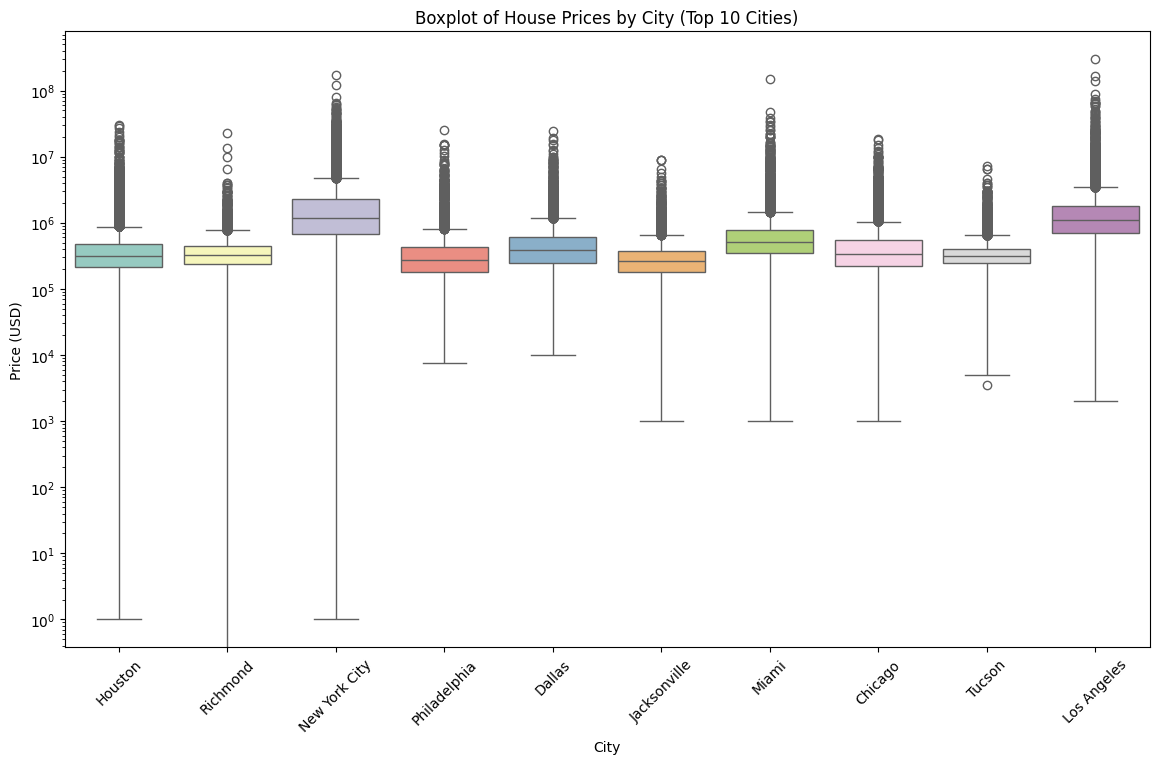

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick a subset of cities to keep the boxplot readable
top_cities = (
    cleaned_df["city"]
    .value_counts()
    .head(10)  # top 10 most frequent cities
    .index
)

subset = cleaned_df[cleaned_df["city"].isin(top_cities)]

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=subset,
    x="city",
    y="price",
    hue="city",
    palette="Set3",
    legend=False
)

plt.xticks(rotation=45)
plt.title("Boxplot of House Prices by City (Top 10 Cities)")
plt.xlabel("City")
plt.ylabel("Price (USD)")
plt.yscale("log")  # 👈 optional, to fix huge skew in prices

plt.show()


# **Expected Output:**
A boxplot with one box per city (top 10 by frequency). We'll see the median house price, the interquartile range, and any outliers. Without log scale, expensive properties will dominate but with log scale, we'll get a much fairer comparison.

# **Data Engineering Insight:**
This step gives us a sanity check. If one city has tons of extreme outliers, it might mess up models later.
By spotting it here, we know whether to normalize or treat those values separately.

# **Exercise 18:**

Pie Chart of House Listings by Status
# **Purpose:**

This shows the proportional distribution of listings — e.g., how many houses are still for sale vs sold.
# **Concepts Used:**

Visualization, Aggregation, Exploratory Data Analysis.

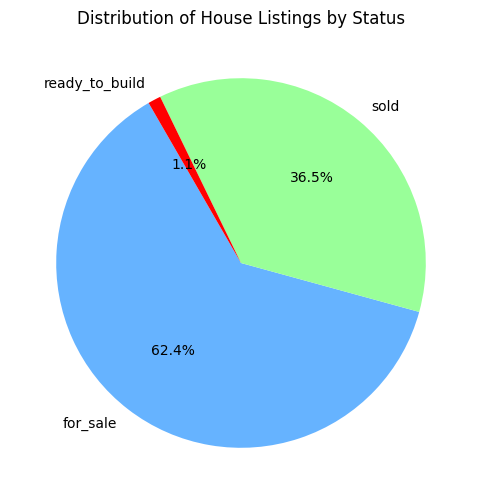

In [66]:
import matplotlib.pyplot as plt

# Count houses by status (for_sale vs sold)
status_counts = cleaned_df["status"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct="%1.1f%%",
    startangle=120,
    colors=["#66b3ff","#99ff99","#FF0000"]  # soft colors for clarity
)
plt.title("Distribution of House Listings by Status")
plt.show()


# **Expected Output**

A pie chart with two slices: One slice for for_sale ...one slice for sold and one for ready to build

# **Data Engineering Insight**
Even though this is a simple visualization, it highlights the business context: Are most properties still on the market or have they already been sold? In a real ETL pipeline, such proportions are key KPIs that help downstream dashboards or analytics.

# **Exercise 19 :**
Line Plot of Monthly Median House Prices

# **Purpose:**
To visualize how house prices change over time. This is like spotting trends in the market.

# **Concepts Used:**
Time-series grouping, aggregation, visualization.

/tmp/ipython-input-3795886884.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df["sold_date"] = pd.to_datetime(


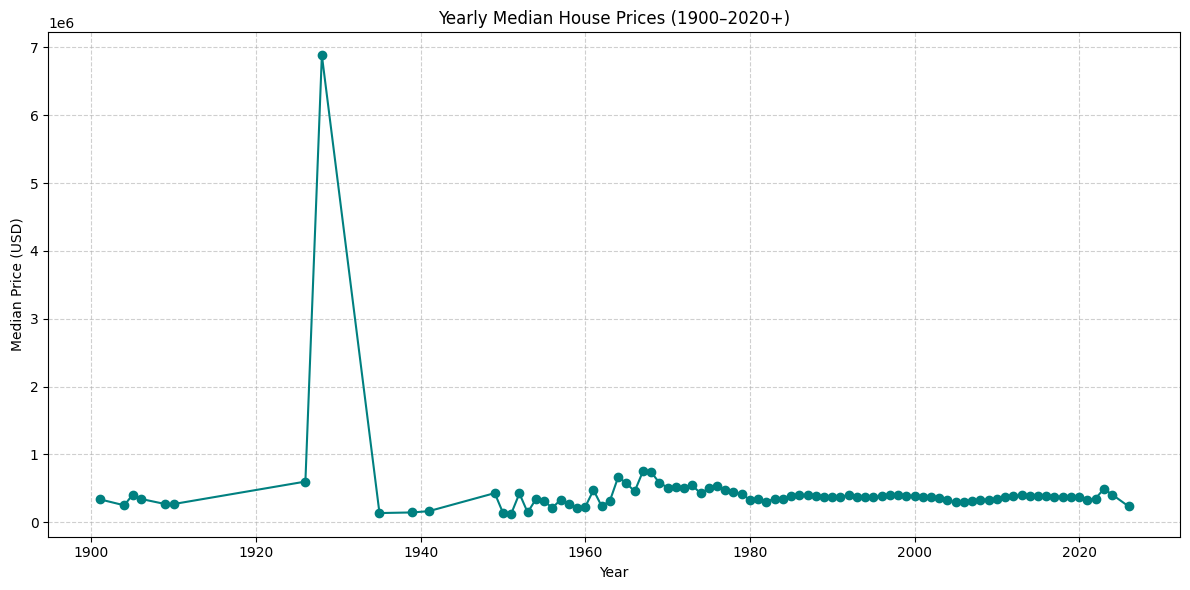

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop rows with missing sold date info
time_df = cleaned_df.dropna(subset=["sold_year", "sold_month"])

# Create a datetime column
time_df["sold_date"] = pd.to_datetime(
    dict(year=time_df["sold_year"], month=time_df["sold_month"], day=1)
)

# Group by year instead of month
yearly_prices = time_df.groupby("sold_year")["price"].median()

plt.figure(figsize=(12,6))
plt.plot(yearly_prices.index, yearly_prices.values, marker="o", linestyle="-", color="teal")

plt.title("Yearly Median House Prices (1900–2020+)")
plt.xlabel("Year")
plt.ylabel("Median Price (USD)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# **Expected Output**
A line plot where:

X-axis = sold_year (timeline by year)

Y-axis = median housing price

The line shows long-term price trends (1900--2020+), with dots marking yearly medians.

# **Data Engineering Insight**
This plot mimics real-world reporting: property portals, banks, or government agencies track housing price trends over time for policy-making, investments, and planning. In pipelines, you'd automate this by aggregating sales data by month and publishing to a dashboard

# **Exercise 20:**
Heatmap - Correlation Validation
# **Purpose:**

Validate numeric relationships in housing dataset (price, size, beds, baths)

# **Concepts Used:**

Data Validation, Visualization, Correlation Analysis

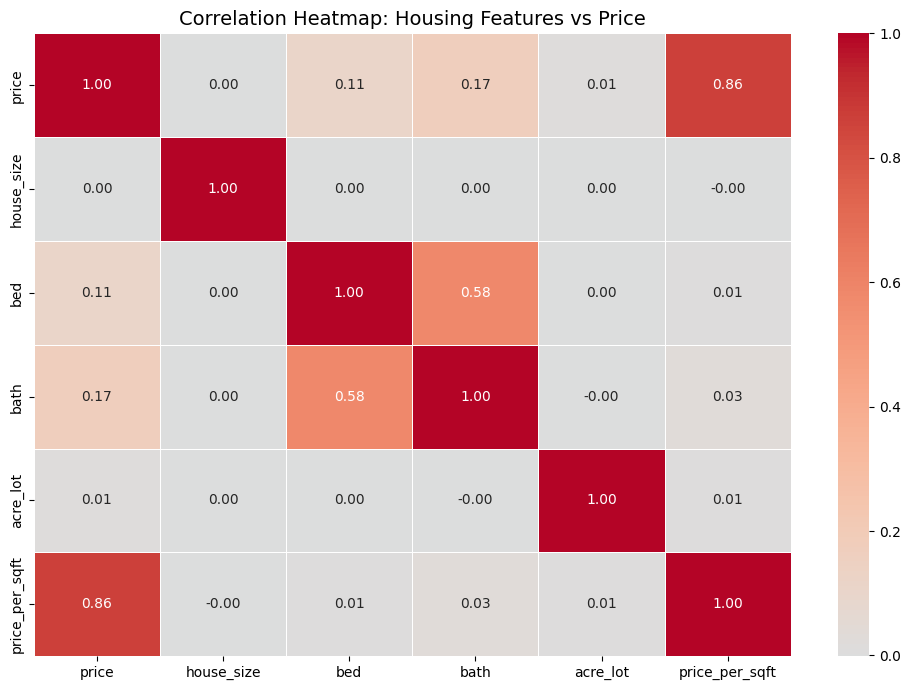

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select numeric columns relevant for correlation
numeric_cols = ["price", "house_size", "bed", "bath", "acre_lot", "price_per_sqft"]
corr_df = cleaned_df[numeric_cols]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Correlation Heatmap: Housing Features vs Price", fontsize=14)
plt.tight_layout()
plt.show()



# **Data Engineering Insight:**
This visualization helps identify strong/weak relationships:
- High positive correlation: house_size vs price
- Low correlation: bath vs acre_lot
